UM MSBA - BGEN632

# W9 Indepedent Lab: Inferential Statistics


## Notebook Setup

In [5]:
# load modules
import os 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import scipy.stats as sts # QQ plot

from scipy.stats import pearsonr # correlation p-values
from sklearn.linear_model import LinearRegression # regression output
import statsmodels.formula.api as smf # ols regression

In [6]:
# set working directory
os.chdir("/Users/obn/Documents/GitHub/UM-BGEN632/week9labs/data") 

In [7]:
# load data
ect_df = pd.read_table('ect_data.txt', sep='\t')
ect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   attitude1_01  201 non-null    int64
 1   attitude1_02  201 non-null    int64
 2   attitude1_03  201 non-null    int64
 3   attitude1_04  201 non-null    int64
 4   intent1_01    201 non-null    int64
 5   intent1_02    201 non-null    int64
 6   intent1_03    201 non-null    int64
 7   intent1_04    201 non-null    int64
 8   peruse01      201 non-null    int64
 9   peruse02      201 non-null    int64
 10  peruse03      201 non-null    int64
 11  peruse04      201 non-null    int64
 12  satis01       201 non-null    int64
 13  satis02       201 non-null    int64
 14  satis03       201 non-null    int64
 15  satis04       201 non-null    int64
dtypes: int64(16)
memory usage: 25.3 KB


### Analysis Overview

Target (i.e, dependent, response, etc.) variable: `intent1_01`  

Predictor (i.e.,independent, explanatory) variables:
* `attitude1_03`
* `attitude1_04`
* `peruse03`
* `peruse04`
* `satis02`

### Create Model

In [9]:
# using sklearn
lin_reg_1 = LinearRegression(fit_intercept=True)
lin_reg_1.fit(ect_df[['attitude1_03', 'attitude1_04', 'peruse03', 'peruse04', 'satis02']], ect_df.intent1_01)

LinearRegression()

In [10]:
# using statsmodels
lin_reg_2 = smf.ols('intent1_01 ~ attitude1_03 + attitude1_04 + peruse03 + peruse04 + satis02', ect_df)

### Check Assumptions

* Assess the validity of the assumptions of 
  * linearity,
  * collinearity,
  * homoscedasticity,
  * independence,
  * and normality

#### Linearity

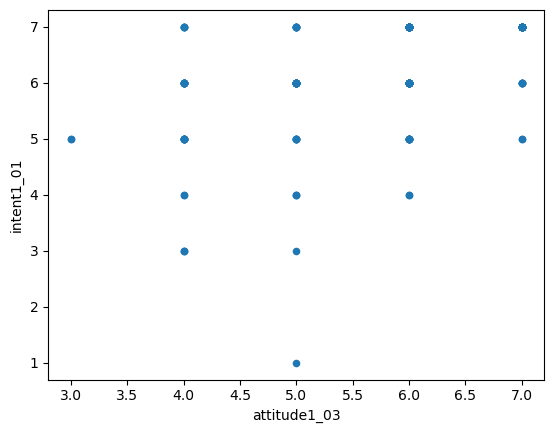

In [12]:
ect_df.plot.scatter(x='attitude1_03', y='intent1_01')
plt.show()

In [13]:
pearsonr(ect_df.intent1_01, ect_df.attitude1_03)

PearsonRResult(statistic=0.519098567478698, pvalue=2.906868451586215e-15)

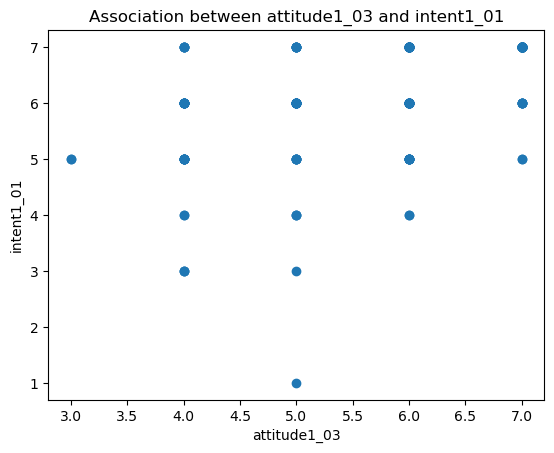

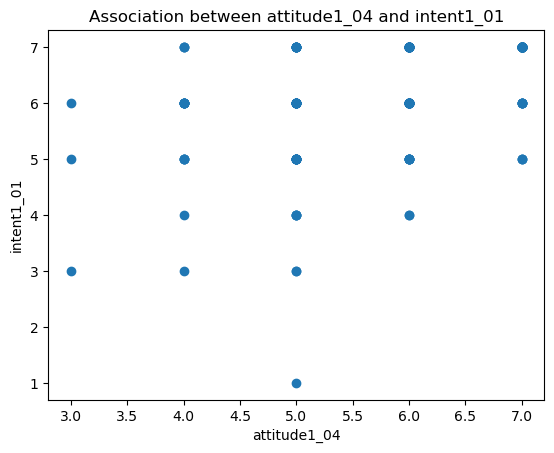

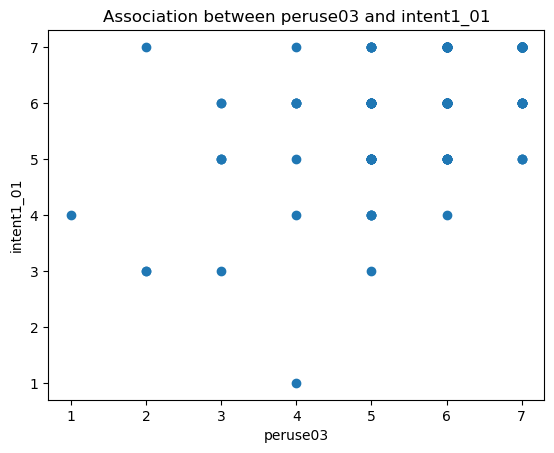

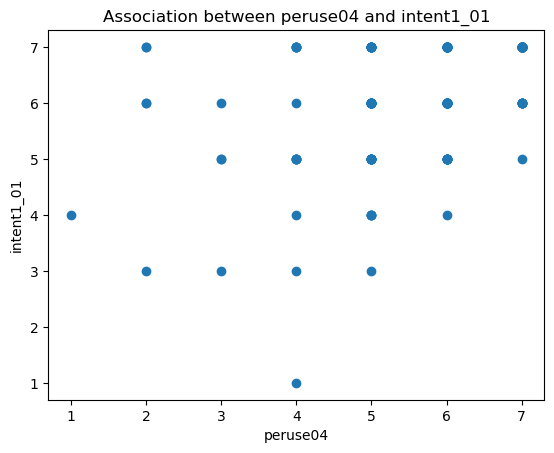

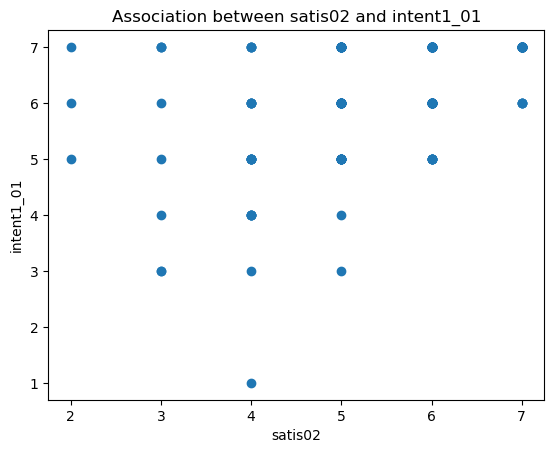

In [14]:
# model variables (predictors)
mod_vars = ['attitude1_03', 'attitude1_04', 'peruse03', 'peruse04', 'satis02']

# for loop for scatterplots
for var in mod_vars:
    plt.figure()  # create new figure
    plt.scatter(x=ect_df[var], y=ect_df['intent1_01']) # build the scatterplot
    plt.xlabel(var) # label the x-axis
    plt.ylabel('intent1_01')  # label the y-axis
    plt.title(f'Association between {var} and intent1_01')
    plt.show()

### Collinearity

How are predictor variables related to each other?

In [16]:
# calculate VIF 
lin_reg_1.fit(ect_df[['attitude1_04', 'peruse03', 'peruse04', 'satis02']], ect_df.attitude1_03)
vif_1 = 1/(1 - lin_reg_1.score(ect_df[['attitude1_04', 'peruse03', 'peruse04', 'satis02']], ect_df.attitude1_03))
print(vif_1)

lin_reg_1.fit(ect_df[['attitude1_03', 'peruse03', 'peruse04', 'satis02']], ect_df.attitude1_04)
vif_2 = 1/(1 - lin_reg_1.score(ect_df[['attitude1_03', 'peruse03', 'peruse04', 'satis02']], ect_df.attitude1_04))
print(vif_2)

lin_reg_1.fit(ect_df[['attitude1_03', 'attitude1_04', 'peruse04', 'satis02']], ect_df.peruse03)
vif_3 = 1/(1 - lin_reg_1.score(ect_df[['attitude1_03', 'attitude1_04', 'peruse04', 'satis02']], ect_df.peruse03))
print(vif_3)

lin_reg_1.fit(ect_df[['attitude1_03', 'attitude1_04', 'peruse03', 'satis02']], ect_df.peruse04)
vif_4 = 1/(1 - lin_reg_1.score(ect_df[['attitude1_03', 'attitude1_04', 'peruse03', 'satis02']], ect_df.peruse04))
print(vif_4)

lin_reg_1.fit(ect_df[['attitude1_03', 'attitude1_04', 'peruse03', 'peruse04']], ect_df.satis02)
vif_5 = 1/(1 - lin_reg_1.score(ect_df[['attitude1_03', 'attitude1_04', 'peruse03', 'peruse04']], ect_df.satis02))
print(vif_5)

4.115331526215196
3.926057532613201
3.2742537092504977
3.0213371642409723
1.5135711989579002


#### Homoscedasticity

lin_reg_2 = smf.ols('intent1_01 ~ attitude1_03 + attitude1_04 + peruse03 + peruse04 + satis02', ect_df)

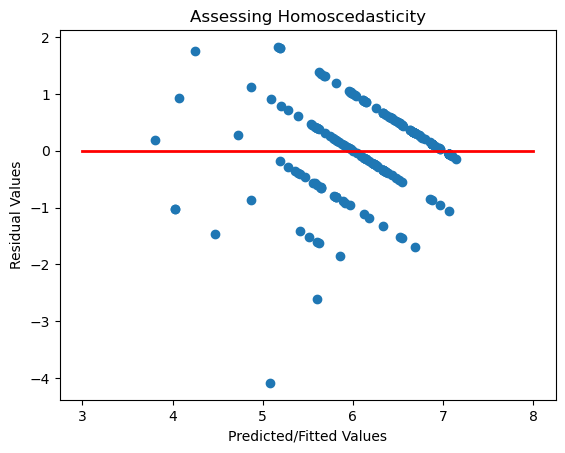

In [18]:
lin_reg_2 = smf.ols('intent1_01 ~ attitude1_03 + attitude1_04 + peruse03 + peruse04 + satis02', ect_df).fit()

plt.scatter(lin_reg_2.fittedvalues, lin_reg_2.resid)
plt.xlabel('Predicted/Fitted Values')
plt.ylabel('Residual Values')
plt.title('Assessing Homoscedasticity')
plt.plot([3, 8],[0, 0], 'red', lw=2)   # add red horizontal line
plt.show()

#### Independence

In [20]:
lin_reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             intent1_01   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     31.12
Date:                Fri, 02 May 2025   Prob (F-statistic):           3.21e-23
Time:                        16:54:15   Log-Likelihood:                -229.71
No. Observations:                 201   AIC:                             471.4
Df Residuals:                     195   BIC:                             491.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.9601      0.358      5.473      0.000       1.254       2.666
attitude1_03     0.0983      0.103      0.953      0.342      -0.105       0.302
attitude1_04     0.1117      0.107      1.044      0.298      -0.099       0.323
peruse03         0.3700      0.085      4.336      0.000       0.202       0.538
peruse04        -0.0386      0.078     -0.493      0.622      -0.193       0.116
satis02          0.1873      0.058      3.245      0.001       0.073       0.301
==============================================================================
Omnibus:                       51.362   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.989
Skew:                          -0.990   Prob(JB):                     6.09e-39
Kurtosis:                       7.135   Cond. No.                         86.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Normality

((array([-2.70235077, -2.39300644, -2.21670641, -2.09047253, -1.99075721,
         -1.90762425, -1.83590295, -1.77254445, -1.71559368, -1.66371874,
         -1.61596971, -1.57164427, -1.53020786, -1.49124379, -1.45442067,
         -1.41947039, -1.38617282, -1.35434495, -1.32383285, -1.29450578,
         -1.26625169, -1.2389738 , -1.21258791, -1.18702027, -1.1622059 ,
         -1.13808725, -1.11461308, -1.09173755, -1.06941949, -1.04762177,
         -1.02631079, -1.005456  , -0.98502958, -0.96500611, -0.94536226,
         -0.92607659, -0.90712937, -0.88850233, -0.87017859, -0.85214246,
         -0.83437937, -0.81687572, -0.79961884, -0.78259687, -0.76579869,
         -0.74921388, -0.73283263, -0.71664571, -0.70064443, -0.68482057,
         -0.66916635, -0.65367443, -0.63833783, -0.62314992, -0.60810442,
         -0.59319534, -0.57841696, -0.56376385, -0.5492308 , -0.53481284,
         -0.52050522, -0.50630336, -0.49220289, -0.47819962, -0.4642895 ,
         -0.45046865, -0.43673331, -0.

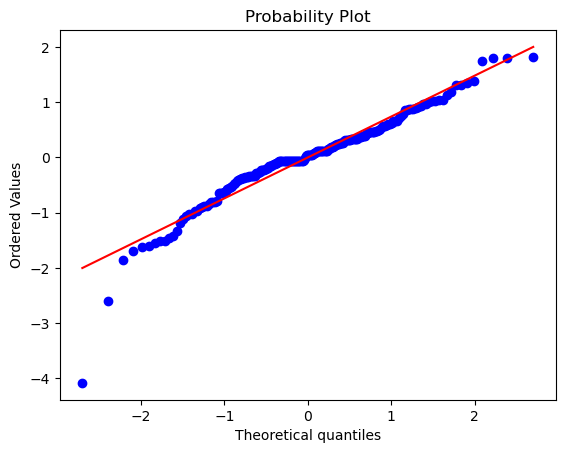

In [22]:
sts.probplot(lin_reg_2.resid, dist="norm", plot=plt)

#### Interpret Model

* Assess your model's F-test and T-tests. 
  * Which variables are significant? Based on what assessment? 
  * Choose two significant variables. From a business perspective, why are they significant?
* Provide the equation for your model and interpret the results.


F = 31.12 
p = 3.21e-23 (0.0000000000000000000000321)

In [24]:
lin_reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             intent1_01   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     31.12
Date:                Fri, 02 May 2025   Prob (F-statistic):           3.21e-23
Time:                        16:54:15   Log-Likelihood:                -229.71
No. Observations:                 201   AIC:                             471.4
Df Residuals:                     195   BIC:                             491.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.9601      0.358      5.473      0.000       1.254       2.666
attitude1_03     0.0983      0.103      0.953      0.342      -0.105       0.302
attitude1_04     0.1117      0.107      1.044      0.298      -0.099       0.323
peruse03         0.3700      0.085      4.336      0.000       0.202       0.538
peruse04        -0.0386      0.078     -0.493      0.622      -0.193       0.116
satis02          0.1873      0.058      3.245      0.001       0.073       0.301
==============================================================================
Omnibus:                       51.362   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.989
Skew:                          -0.990   Prob(JB):                     6.09e-39
Kurtosis:                       7.135   Cond. No.                         86.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

intent to use (intent1_01) 

perceived useful peruse03
satisfied satis02


If an employee perceives a system to be useful, they are more likely to use it.
If an employee is satisfied with a system, they are more likely to use it.

**intent1_01 = 1.96 + 0.37 peruse03 + 0.19 satis02**

* For every unit increase in perceived usefulness, an employee will be more likely to use the system by 0.37
* For every unit increase in satisfaction, an employee will be more likely to use the system by 0.19